1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Preprocessing the data](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Training and testing the Model](#section5)<br>
    - 5.1 [Splitting data into training and test datasets](#section501)<br>
6. [Random Forest](#section6)<br>
    - 6.1 [Random Forest in scikit learn](#section601)<br>
    - 6.2 [Using the Model for Prediction](#section602)<br> 
    - 6.3 [Model evaluation for Random Forest](#section603)<br>
7. [Linear Regression](#section7)<br>
    - 7.1 [Linear Regression in scikit learn](#section701)<br>
    - 7.2 [Using the Model for Prediction](#section702)<br> 
    - 7.3 [Model evaluation for Linear Regression](#section703)<br>
8. [Conclusion](#section8)

### 1. Problem Statement <a id=section1></a>

Goal is to predict **sale price** of a house using various features.

### 2. Data Loading and Description <a id=section2></a>

The dataset consists of continuous and categoical variables about various houses along with their house sale price.

Dataset consists of 80 columns and 1460 rows.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| SalePrice     | the property's sale price in dollars.                     | 
| MSSubClass    | The building class                                        |  
|MSZoning       | The general zoning classification                         |
|LotFrontage    | Linear feet of street connected to property               |
|LotArea        | Lot size in square feet                                   |
|Street         | Type of road access                                       |
|Alley          | Type of alley access                                      |
|LotShape       | General shape of property                                 |
|LandContour    | Flatness of the property                                  |
|Utilities      | Type of utilities available                               |
|LotConfig      | Lot configuration                                         |
|LandSlope      | Slope of property                                         |
|Neighborhood   | Physical locations within Ames city limits                |
|Condition1     | Proximity to main road or railroad                        |
|Condition2     | Proximity to main road or railroad                        |
|BldgType       | Type of dwelling                                          |
|HouseStyle     | Style of dwelling                                         |
|OverallQual    | Overall material and finish quality                       |
|OverallCond    | Overall condition rating                                  |
|YearBuilt      | Original construction date                                |
|YearRemodAdd   | Remodel date                                              |
|RoofStyle      | Type of roof                                              |
|RoofMatl       | Roof material                                             |
|Exterior1st    | Exterior covering on house                                |
|Exterior2nd    | Exterior covering on house (if more than one material)    |
|MasVnrType     | Masonry veneer type                                       |
|MasVnrArea     | Masonry veneer area in square feet                        |
|ExterQual      | Exterior material quality                                 |
|ExterCond      | Present condition of the material on the exterior         |
|Foundation     | Type of foundation                                        |
|BsmtQual       | Height of the basement                                    |
|BsmtCond       | General condition of the basement                         |
|BsmtExposure   | Walkout or garden level basement walls                    |
|BsmtFinType1   | Quality of basement finished area                         |
|BsmtFinSF1     | Type 1 finished square feet                               |
|BsmtFinType2   | Quality of second finished area (if present)              |
|BsmtFinSF2     | Type 2 finished square feet                               |
|BsmtUnfSF      | Unfinished square feet of basement area                   |
|TotalBsmtSF    | Total square feet of basement area                        |
|Heating        | Type of heating                                           |
|HeatingQC      | Heating quality and condition                             |
|CentralAir     | Central air conditioning                                  |
|Electrical     | Electrical system                                         |
|1stFlrSF       | First Floor square feet                                   |
|2ndFlrSF       | Second floor square feet                                  |
|LowQualFinSF   | Low quality finished square feet (all floors)             |
|GrLivArea      | Above grade (ground) living area square feet              |
|BsmtFullBath   | Basement full bathrooms                                   |
|BsmtHalfBath   | Basement half bathrooms                                   |
|FullBath       | Full bathrooms above grade                                |
|HalfBath       | Half baths above grade                                    |
|Bedroom        | Number of bedrooms above basement level                   |
|Kitchen        | Number of kitchens                                        |
|KitchenQual    | Kitchen quality                                           |
|TotRmsAbvGrd   | Total rooms above grade (does not include bathrooms)      |
|Functional     | Home functionality rating                                 |
|Fireplaces     | Number of fireplaces                                      |
|FireplaceQu    |Fireplace quality                                          |
|GarageType     | Garage location                                           | 
|GarageYrBlt    | Year garage was built                                     |
|GarageFinish   | Interior finish of the garage                             |
|GarageCars     | Size of garage in car capacity                            |
|GarageArea     | Size of garage in square feet                             |
|GarageQual     | Garage quality                                            |
|GarageCond     | Garage condition                                          |
|PavedDrive     | Paved driveway                                            |   
|WoodDeckSF     | Wood deck area in square feet                             |
|OpenPorchSF    | Open porch area in square feet                            |
|EnclosedPorch  | Enclosed porch area in square feet                        |
|3SsnPorch      | Three season porch area in square feet                    |
|ScreenPorch    | Screen porch area in square feet                          |
|PoolArea       | Pool area in square feet                                  |
|PoolQC         | Pool quality                                              |
|Fence          | Fence quality                                             |
|MiscFeature    | Miscellaneous feature not covered in other categories     |
|MiscVal        | $Value of miscellaneous feature                           |
|MoSold         | Month Sold                                                |
|YrSold         | Year Sold                                                 |
|SaleType       | Type of sale                                              |
|SaleCondition  | Condition of sale                                         |

#### Importing Packages

In [139]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

In [140]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

#### Importing the Dataset

In [141]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")     # Importing training dataset using pd.read_csv

In [142]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [143]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [145]:
data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

## 3. Preprocessing the data <a id=section3></a>

In [146]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Following features to be dropped due to lot of miscellaneous features:
ID, Alley, FireplaceQu ,PoolQC, Fence, MiscFeature

In [147]:
# Create mapping which works for Kitchen, Garage and Basement
mapping = {'Ex': 5.0, 'Gd': 4.0, 'TA': 3.0, 'Fa': 2.0, 'Po': 1.0}

# Remap values
data.replace({'KitchenQual': mapping}, inplace=True)
data.replace({'BsmtQual': mapping}, inplace=True)
data.replace({'BsmtCond': mapping}, inplace=True)
data.replace({'GarageQual': mapping}, inplace=True)
data.replace({'GarageCond': mapping}, inplace=True)

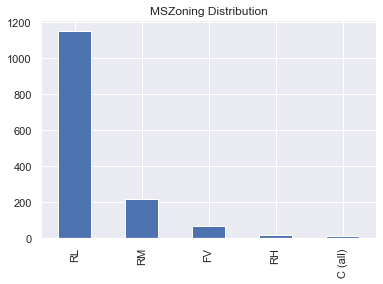

In [148]:
data['MSZoning'].value_counts().plot(kind='bar', title='MSZoning Distribution')

In [149]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

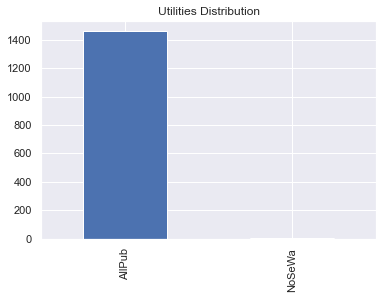

In [150]:
data['Utilities'].value_counts().plot(kind='bar', title='Utilities Distribution')

In [151]:
data.drop(columns=['Utilities'], inplace=True)
# Removing this since there is only 1 value

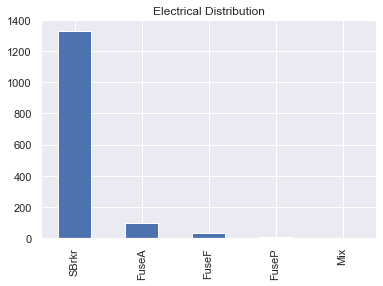

In [152]:
data['Electrical'].value_counts().plot(kind='bar', title='Electrical Distribution')

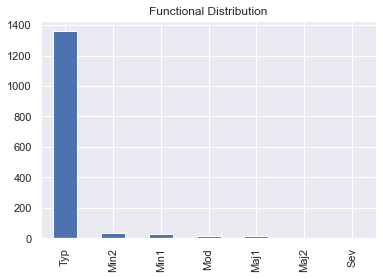

In [153]:
data['Functional'].value_counts().plot(kind='bar', title='Functional Distribution')

Filling null values with **Mean and Mode depending values are continuous and discrete.**

In [154]:
data.LotFrontage.fillna(data.LotFrontage.mean(), inplace = True)

In [155]:
data.groupby(['MasVnrType'])['MasVnrType'].count()

MasVnrType
BrkCmn      15
BrkFace    445
None       864
Stone      128
Name: MasVnrType, dtype: int64

In [156]:
data.MasVnrType.mode()

0    None
dtype: object

In [157]:
data.MasVnrType.fillna(data['MasVnrType'].mode()[0], inplace=True)

In [158]:
data.MasVnrArea.fillna(data.MasVnrArea.mean(), inplace = True)

In [159]:
data.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
2.0     35
3.0    649
4.0    618
5.0    121
Name: BsmtQual, dtype: int64

In [160]:
data.BsmtQual.mode()

0    3.0
dtype: float64

In [161]:
data.BsmtQual=data.BsmtQual.fillna(data['BsmtQual'].mode()[0])

In [162]:
data.groupby(['BsmtCond'])['BsmtCond'].count()

BsmtCond
1.0       2
2.0      45
3.0    1311
4.0      65
Name: BsmtCond, dtype: int64

In [163]:
data.BsmtCond.mode()

0    3.0
dtype: float64

In [164]:
data.BsmtCond=data.BsmtCond.fillna(data['BsmtCond'].mode()[0])

In [165]:
data.groupby(['BsmtExposure'])['BsmtExposure'].count()

BsmtExposure
Av    221
Gd    134
Mn    114
No    953
Name: BsmtExposure, dtype: int64

In [166]:
data.BsmtExposure.mode()

0    No
dtype: object

In [167]:
data.BsmtExposure=data.BsmtExposure.fillna(data['BsmtExposure'].mode()[0])

In [168]:
data.groupby(['BsmtFinType1'])['BsmtFinType1'].count()

BsmtFinType1
ALQ    220
BLQ    148
GLQ    418
LwQ     74
Rec    133
Unf    430
Name: BsmtFinType1, dtype: int64

In [169]:
data.BsmtFinType1.mode()

0    Unf
dtype: object

In [170]:
data.BsmtFinType1=data.BsmtFinType1.fillna(data['BsmtFinType1'].mode()[0])

In [171]:
data.groupby(['BsmtFinType2'])['BsmtFinType2'].count()

BsmtFinType2
ALQ      19
BLQ      33
GLQ      14
LwQ      46
Rec      54
Unf    1256
Name: BsmtFinType2, dtype: int64

In [172]:
data.BsmtFinType2.mode()

0    Unf
dtype: object

In [173]:
data.BsmtFinType2=data.BsmtFinType2.fillna(data['BsmtFinType2'].mode()[0])

In [174]:
data.groupby(['Electrical'])['Electrical'].count()

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
Name: Electrical, dtype: int64

In [175]:
data.Electrical=data.Electrical.fillna(data['Electrical'].mode()[0])

In [176]:
data.groupby(['GarageType'])['GarageType'].count()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: GarageType, dtype: int64

In [177]:
data.GarageType.mode()

0    Attchd
dtype: object

In [178]:
data.GarageType=data.GarageType.fillna(data['GarageType'].mode()[0])

In [179]:
data.GarageYrBlt.fillna(data.GarageYrBlt.mean(), inplace = True)

In [180]:
data.groupby(['GarageFinish'])['GarageFinish'].count()

GarageFinish
Fin    352
RFn    422
Unf    605
Name: GarageFinish, dtype: int64

In [181]:
data.GarageFinish.mode()

0    Unf
dtype: object

In [182]:
data.GarageFinish=data.GarageFinish.fillna(data['GarageFinish'].mode()[0])

In [183]:
data.groupby(['GarageQual'])['GarageQual'].count()

GarageQual
1.0       3
2.0      48
3.0    1311
4.0      14
5.0       3
Name: GarageQual, dtype: int64

In [184]:
data.GarageQual.mode()

0    3.0
dtype: float64

In [185]:
data.GarageQual = data.GarageQual.fillna(data['GarageQual'].mode()[0])

In [186]:
data.groupby(['GarageCond'])['GarageCond'].count()

GarageCond
1.0       7
2.0      35
3.0    1326
4.0       9
5.0       2
Name: GarageCond, dtype: int64

In [187]:
data.GarageCond.mode()

0    3.0
dtype: float64

In [188]:
data.GarageCond = data.GarageCond.fillna(data['GarageCond'].mode()[0])

In [189]:
data['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [190]:
# MoSold
mapping = {1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 
           8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
data.replace({'MoSold': mapping}, inplace=True)

In [191]:
data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [192]:
# MSSubClass
mapping = {20:'A', 30:'B', 40:'C', 45:'D', 50:'E', 60:'F', 70:'G', 75:'H', 80:'I', 85:'J', 
           90:'K', 120:'L', 150:'M', 160:'N', 180:'O', 190:'P'}
data.replace({'MSSubClass': mapping}, inplace=True)


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [194]:
drop_cols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']

In [195]:
data.drop(drop_cols,axis=1, inplace=True)

In [196]:
# ==== Create some new features
data['sale_age'] = 2020 - data['YrSold'] 
data['house_age'] = 2020 - data['YearBuilt'] 
data['remodel_age'] = 2020 - data['YearRemodAdd']
data['garage_age'] = 2020 - data['GarageYrBlt']
data.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], inplace=True)

In [197]:
drop_cols = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']    # TotalBsmtSF = BsmtFinSF1 + BsmtUnfSF + BsmtFinSF2

In [198]:
data.drop(drop_cols,axis=1,inplace=True)

In [199]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,sale_age,house_age,remodel_age,garage_age
0,1,F,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4.0,8,Typ,0,Attchd,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,0,0,Feb,WD,Normal,208500,12,17,17,17.0
1,2,A,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3.0,6,Typ,1,Attchd,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,0,0,May,WD,Normal,181500,13,44,44,44.0
2,3,F,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4.0,6,Typ,1,Attchd,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,0,0,Sep,WD,Normal,223500,12,19,18,19.0
3,4,G,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4.0,7,Typ,1,Detchd,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,0,0,Feb,WD,Abnorml,140000,14,105,50,22.0
4,5,F,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4.0,9,Typ,1,Attchd,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,0,0,Dec,WD,Normal,250000,12,20,20,20.0


In [200]:
drop_cols = ['1stFlrSF','2ndFlrSF','LowQualFinSF']    # GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFinSF

In [201]:
data.drop(drop_cols,axis=1,inplace=True)

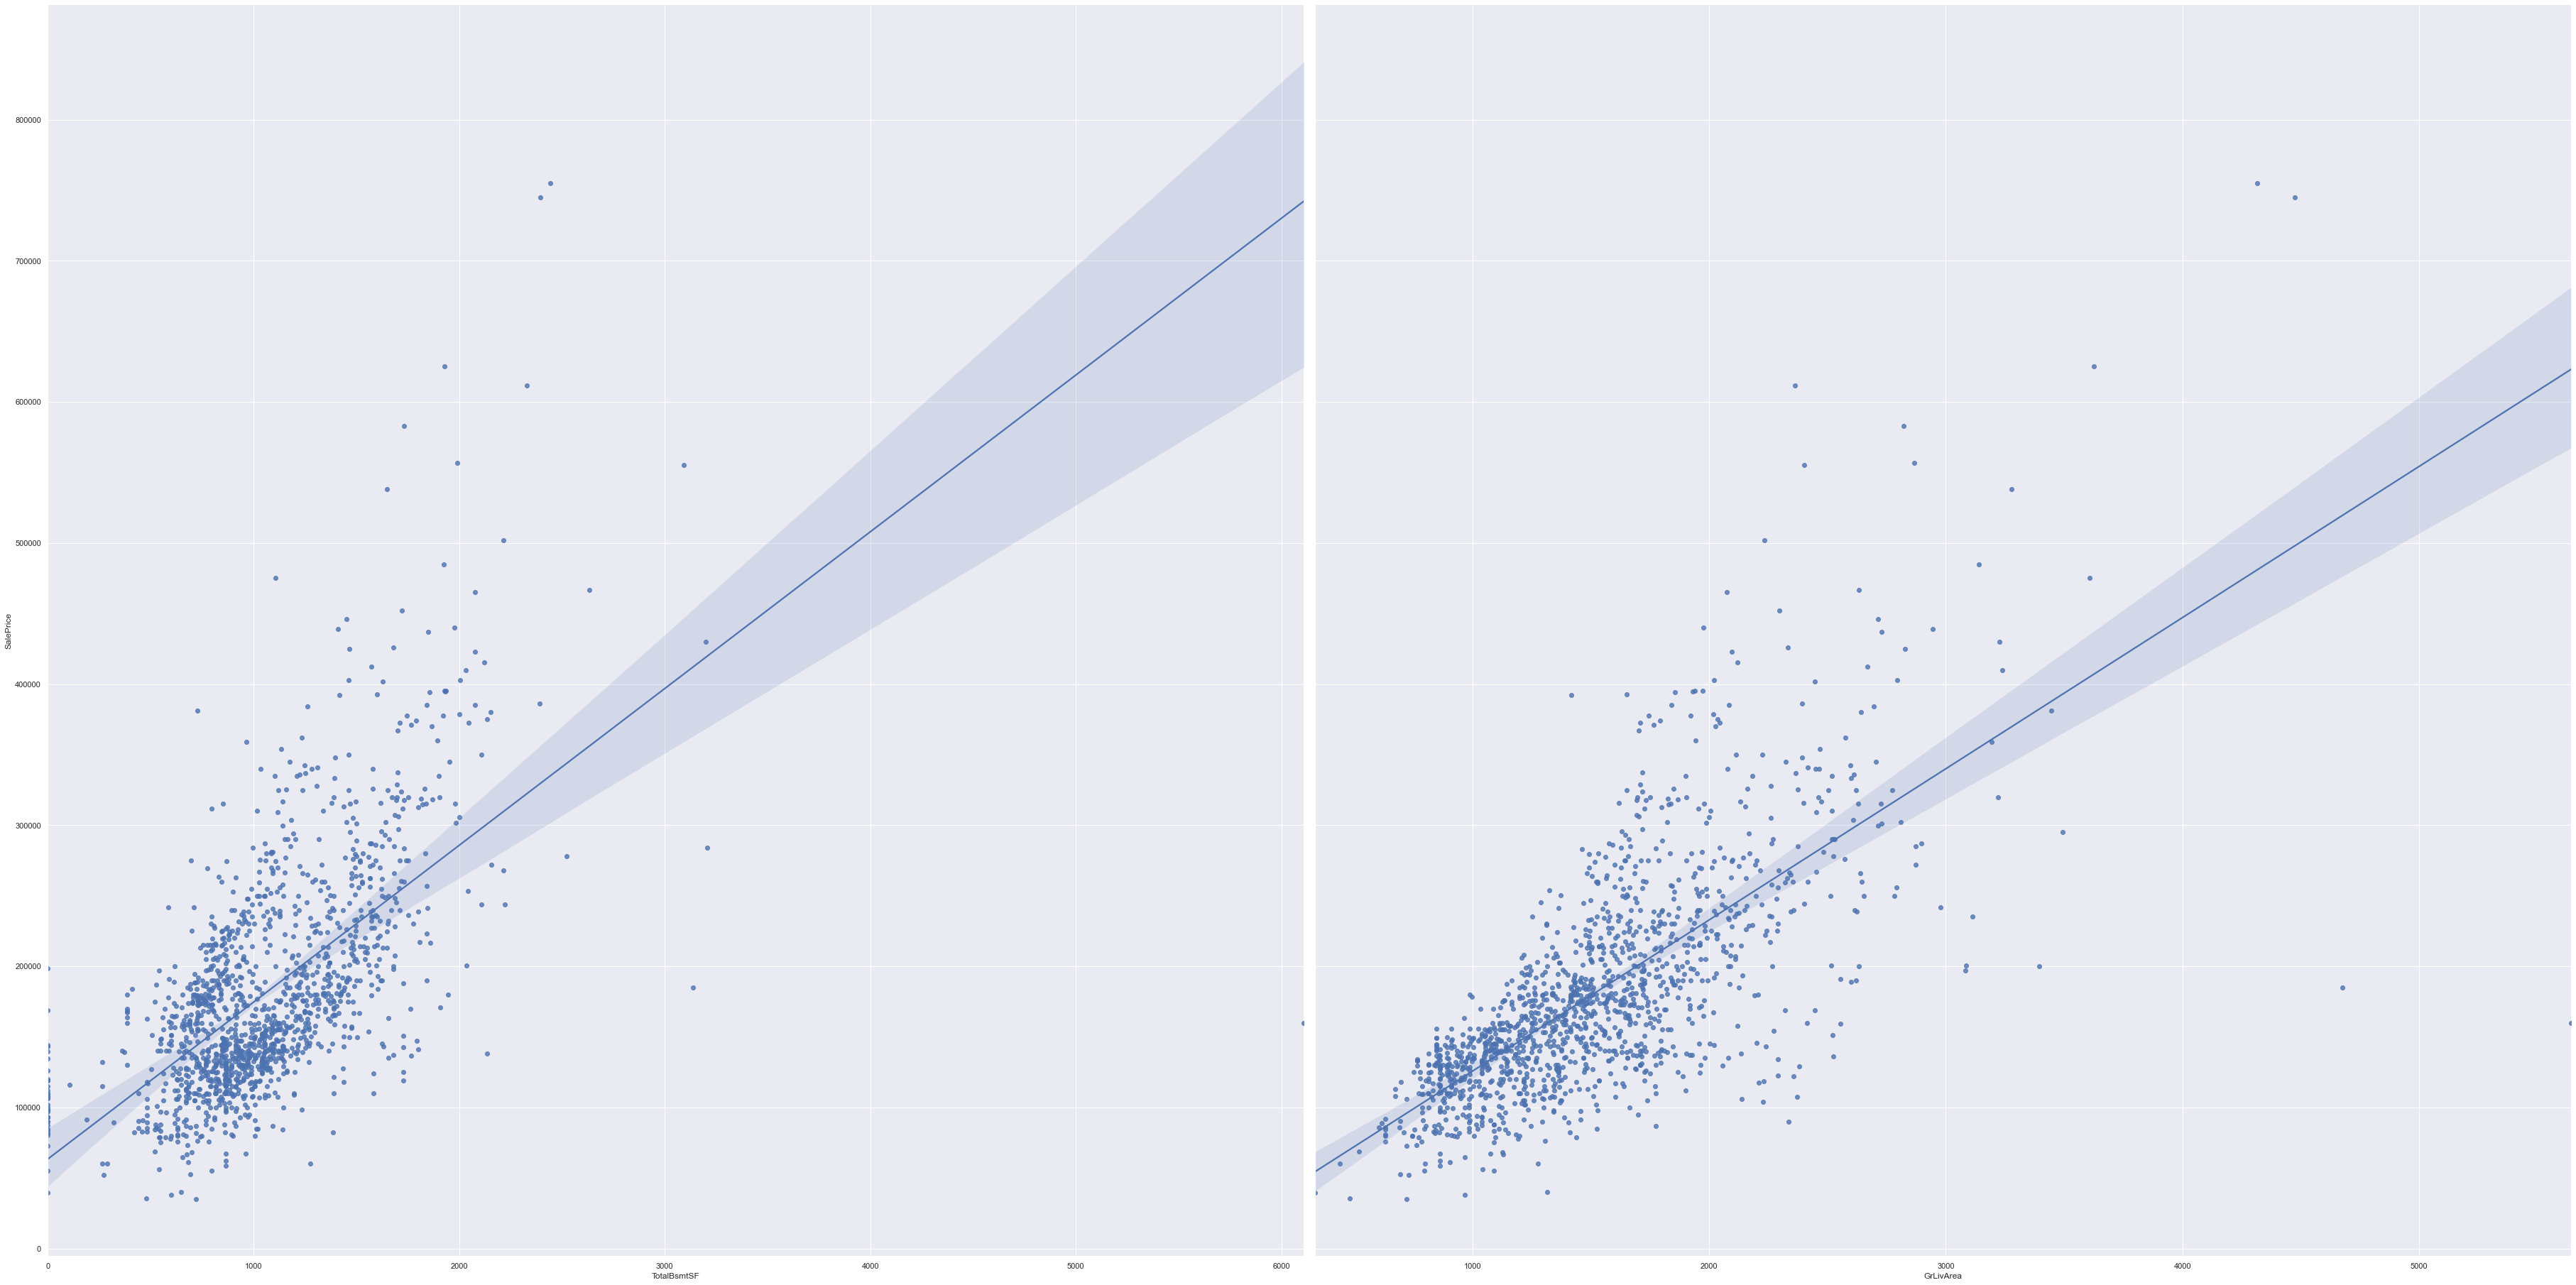

In [202]:
sns.pairplot(data, x_vars=['TotalBsmtSF','GrLivArea'], y_vars='SalePrice', size=25, aspect=1, kind='reg')

In [203]:
data['TotalArea'] = data['TotalBsmtSF']+data['GrLivArea']

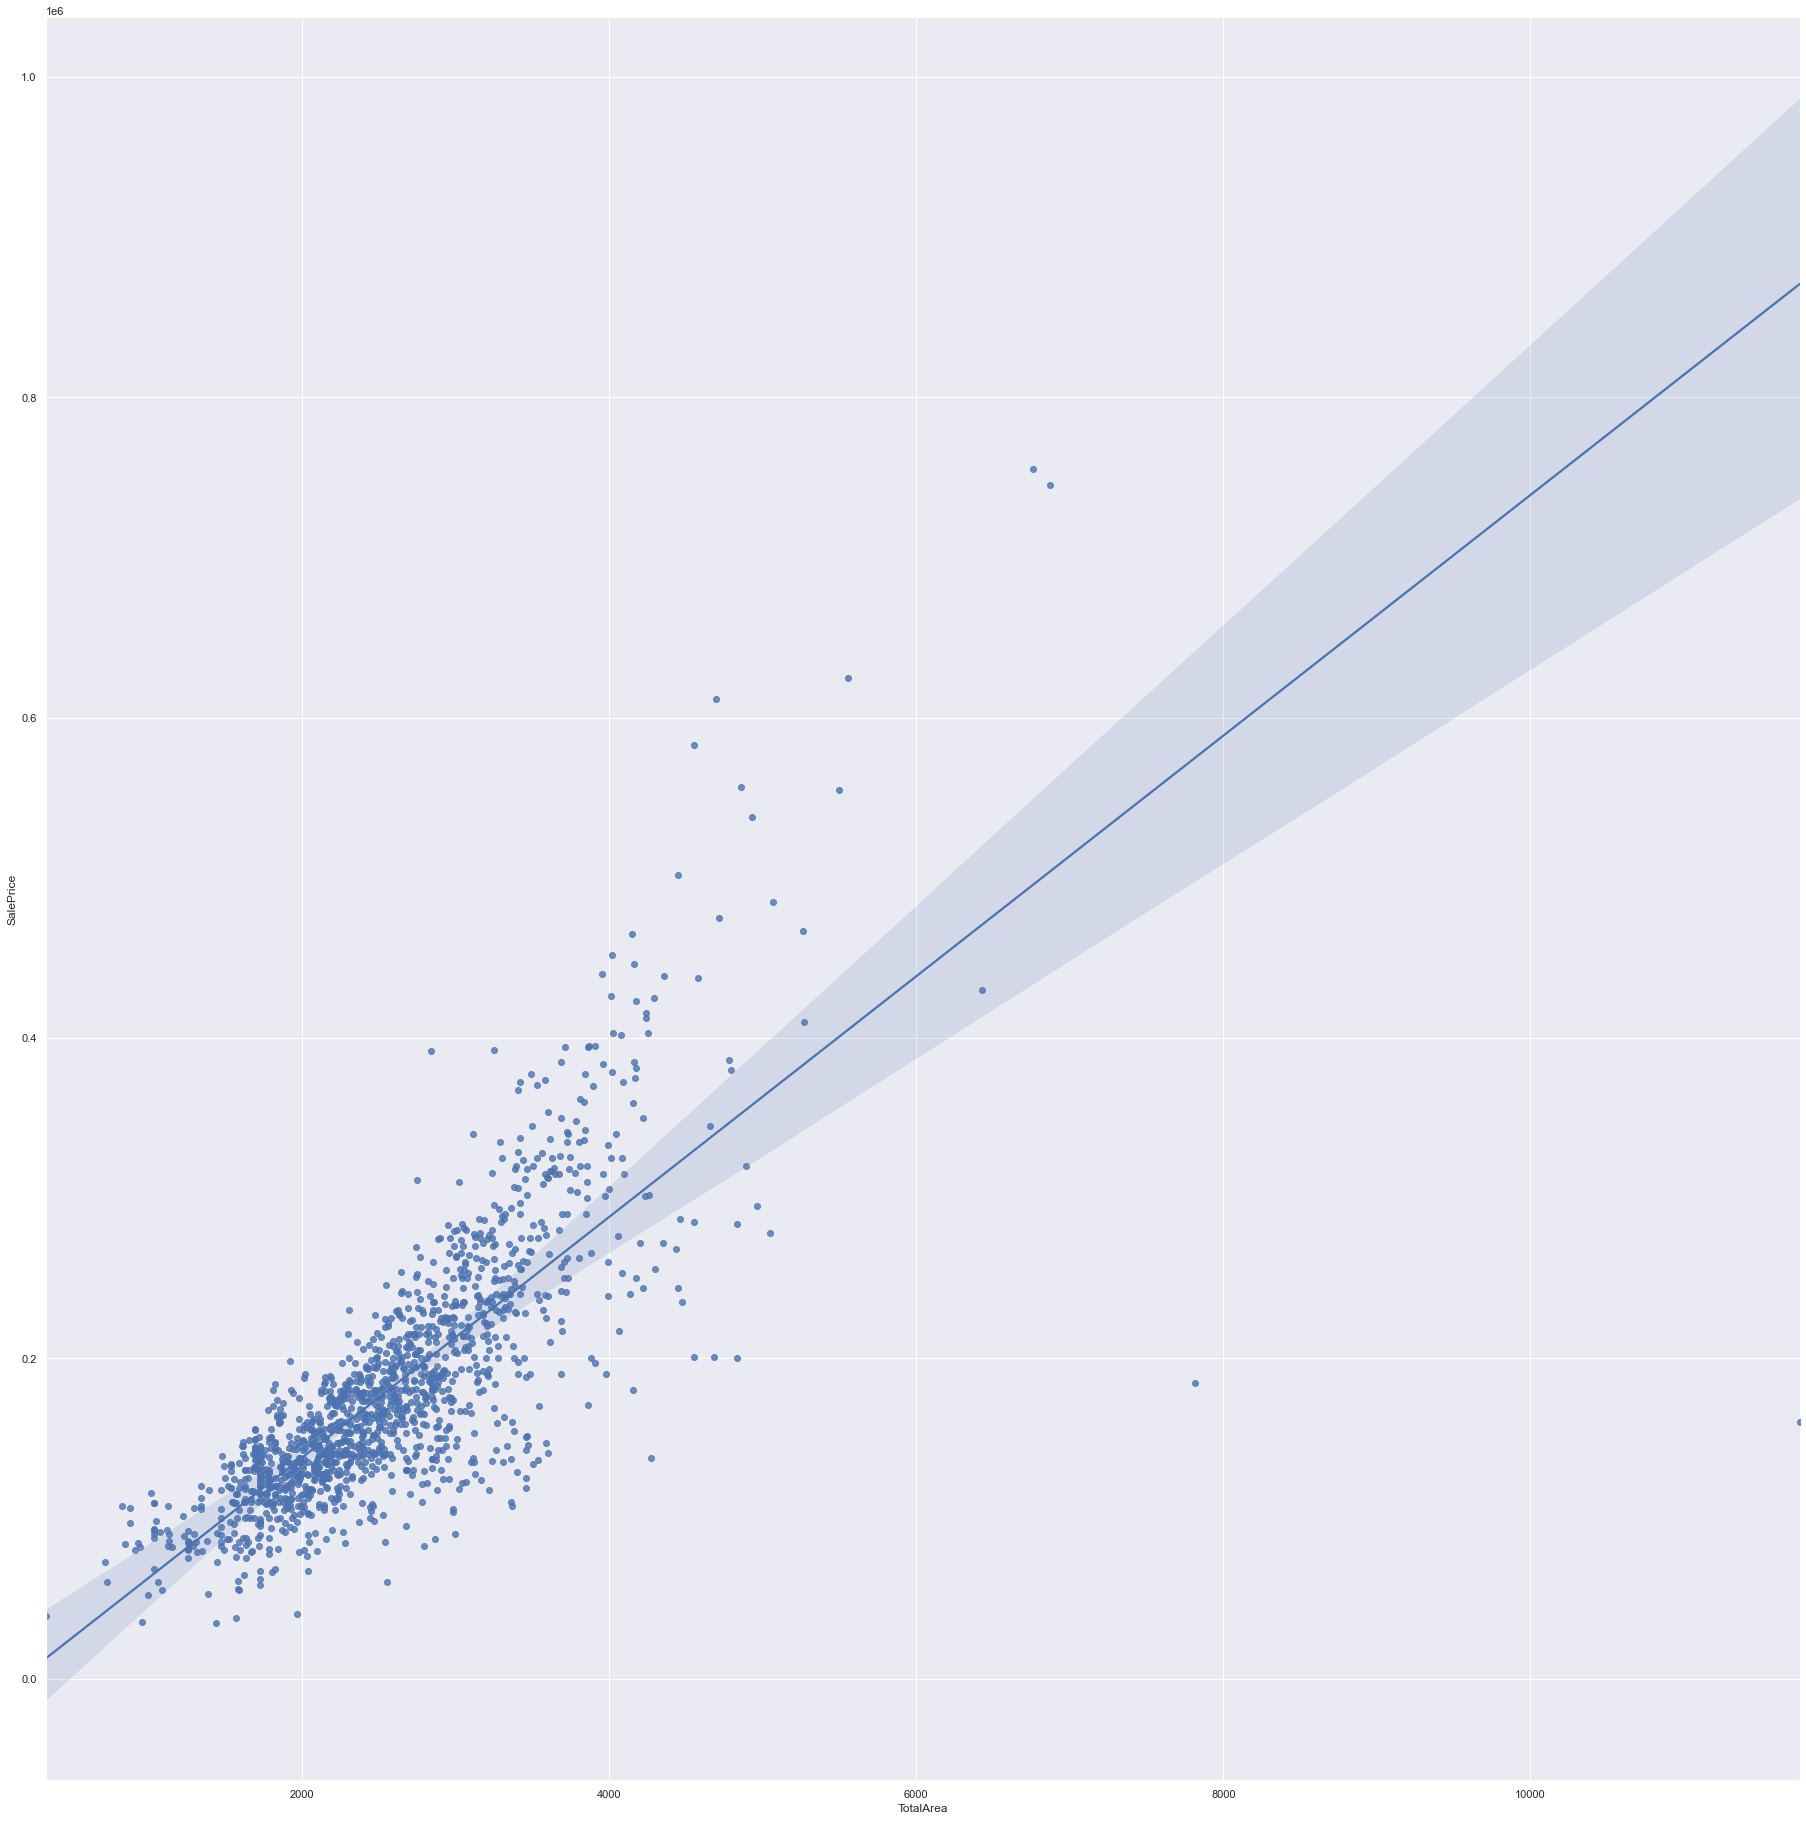

In [204]:
sns.pairplot(data, x_vars=['TotalArea'], y_vars='SalePrice', size=25, aspect=1, kind='reg')

In [205]:
drop_cols = ['TotalBsmtSF','GrLivArea']

In [206]:
data.drop(drop_cols,axis=1,inplace=True)

In [207]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,sale_age,house_age,remodel_age,garage_age,TotalArea
0,1,F,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,4.0,8,Typ,0,Attchd,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,0,0,Feb,WD,Normal,208500,12,17,17,17.0,2566
1,2,A,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,3.0,6,Typ,1,Attchd,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,0,0,May,WD,Normal,181500,13,44,44,44.0,2524
2,3,F,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,4.0,6,Typ,1,Attchd,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,0,0,Sep,WD,Normal,223500,12,19,18,19.0,2706
3,4,G,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,4.0,7,Typ,1,Detchd,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,0,0,Feb,WD,Abnorml,140000,14,105,50,22.0,2473
4,5,F,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,4.0,9,Typ,1,Attchd,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,0,0,Dec,WD,Normal,250000,12,20,20,20.0,3343


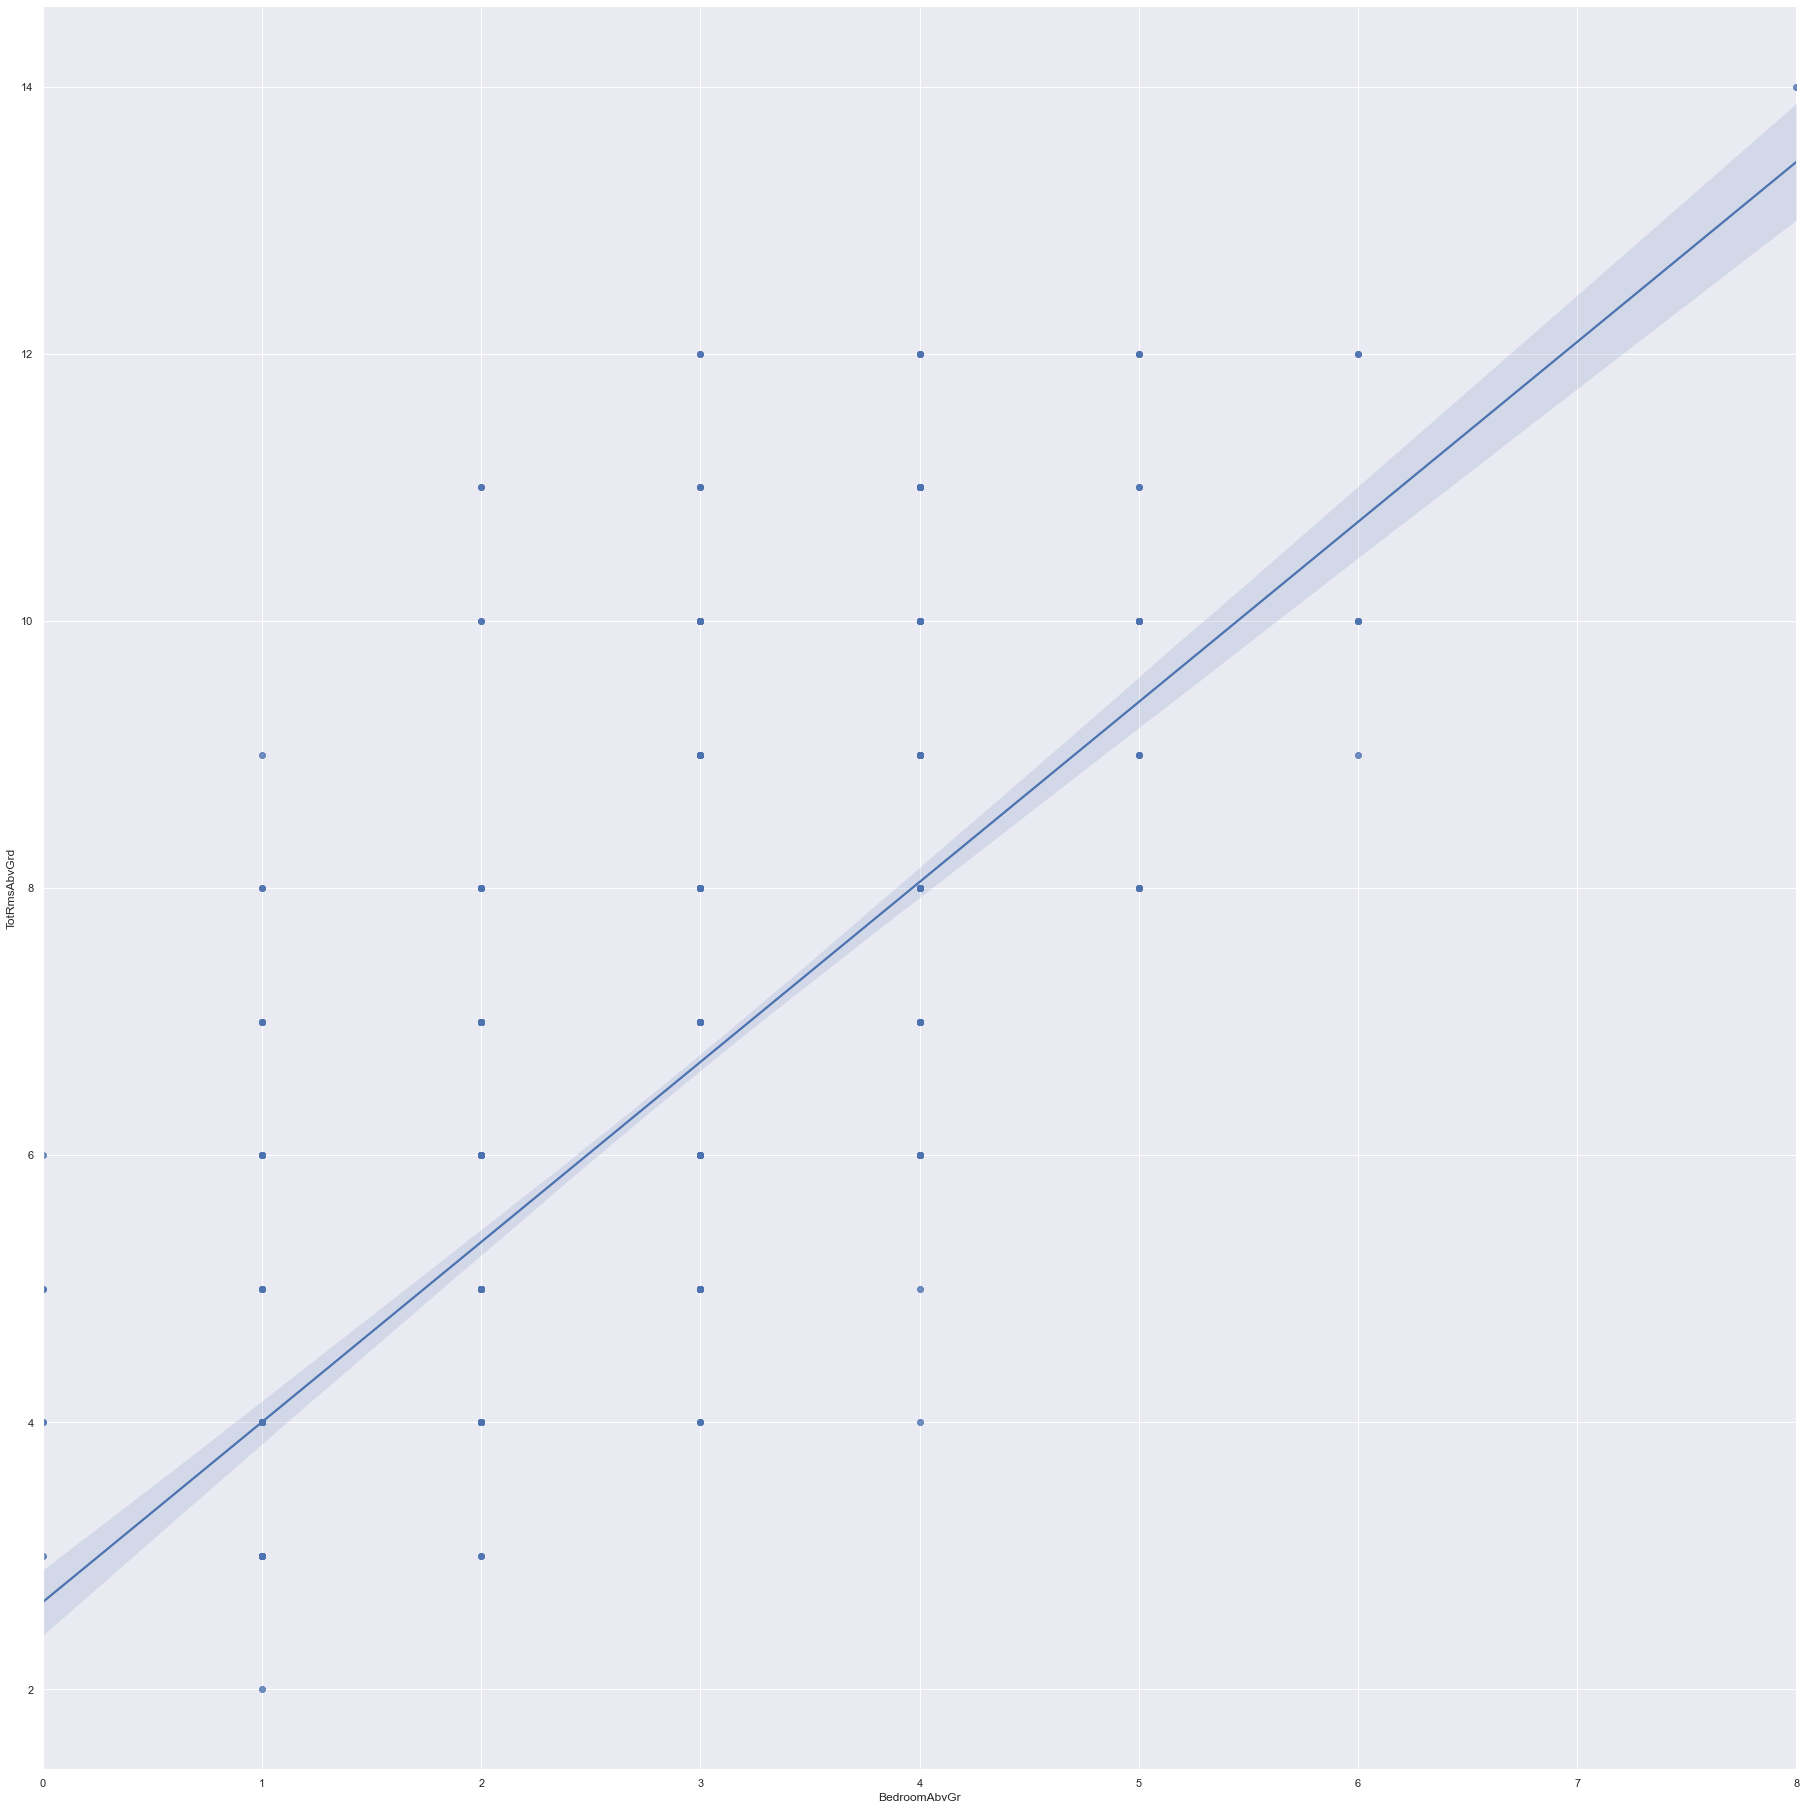

In [208]:
sns.pairplot(data, x_vars=['BedroomAbvGr'], y_vars='TotRmsAbvGrd', size=25, aspect=1, kind='reg')

In [209]:
dataTest = data['BedroomAbvGr']

In [210]:
dataTest = pd.DataFrame(dataTest)

In [211]:
dataTest['KitchenAbvGr'] = data['KitchenAbvGr']

In [212]:
dataTest['TotRmsAbvGrd'] = data['TotRmsAbvGrd']

In [213]:
dataTest['SumofRoomAbvGrd'] = data['BedroomAbvGr'] + data['KitchenAbvGr']

In [214]:
dataTest['SalePrice'] = data['SalePrice']

In [215]:
dataTest.head()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,SumofRoomAbvGrd,SalePrice
0,3,1,8,4,208500
1,3,1,6,4,181500
2,3,1,6,4,223500
3,3,1,7,4,140000
4,4,1,9,5,250000


In [216]:
corr_test = dataTest.corr()

Text(0.5, 1.0, 'Correlation between features')

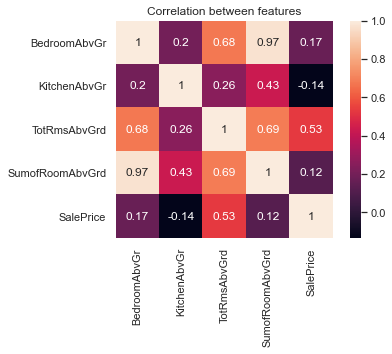

In [217]:
sns.heatmap(corr_test, square = True, annot = True) #  vmin=-1, vmax=1
plt.title('Correlation between features')

In [218]:
# BedroomAbvGr and KitchenAbvGr has very low correlation with SalePrice
# BedroomAbvGr has high correlation with TotRmsAbvGrd

drop_cols = ['BedroomAbvGr', 'KitchenAbvGr']

In [219]:
data.drop(drop_cols, axis=1,inplace=True)

In [220]:
#remove ID column
data.drop(['Id'], axis=1, inplace=True)

In [221]:
Bath_cols = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']

In [222]:
data_bath = data[Bath_cols]

In [223]:
data_bath['SalePrice'] = data['SalePrice']

In [224]:
data_bath['TotalBath'] = data_bath['BsmtFullBath'] + 0.5*data_bath['BsmtHalfBath'] + data_bath['FullBath'] + 0.5*data_bath['HalfBath']

In [225]:
corr_test = data_bath.corr()

Text(0.5, 1.0, 'Correlation between features')

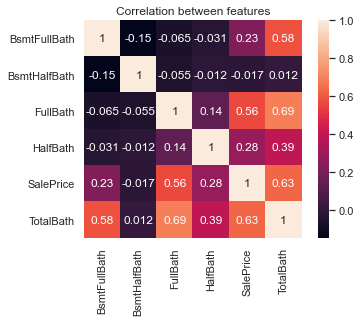

In [226]:
sns.heatmap(corr_test, square = True, annot = True) #  vmin=-1, vmax=1
plt.title('Correlation between features')

In [227]:
data['TotalBath'] = data['BsmtFullBath'] + 0.5*data['BsmtHalfBath'] + data['FullBath'] + 0.5*data['HalfBath']

In [228]:
drop_cols = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']

In [229]:
data.drop(drop_cols, axis=1, inplace=True)

In [230]:
data.isnull().sum().any()

False

## 4. Exploratory Data Analysis <a id=section4></a>

In [231]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,sale_age,house_age,remodel_age,garage_age,TotalArea,TotalBath
0,F,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,No,GLQ,Unf,GasA,Ex,Y,SBrkr,4.0,8,Typ,0,Attchd,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,0,0,Feb,WD,Normal,208500,12,17,17,17.0,2566,3.5
1,A,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,3.0,6,Typ,1,Attchd,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,0,0,May,WD,Normal,181500,13,44,44,44.0,2524,2.5
2,F,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,4.0,6,Typ,1,Attchd,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,0,0,Sep,WD,Normal,223500,12,19,18,19.0,2706,3.5
3,G,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,No,ALQ,Unf,GasA,Gd,Y,SBrkr,4.0,7,Typ,1,Detchd,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,0,0,Feb,WD,Abnorml,140000,14,105,50,22.0,2473,2.0
4,F,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,4.0,9,Typ,1,Attchd,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,0,0,Dec,WD,Normal,250000,12,20,20,20.0,3343,3.5


In [232]:
corr = data.corr()

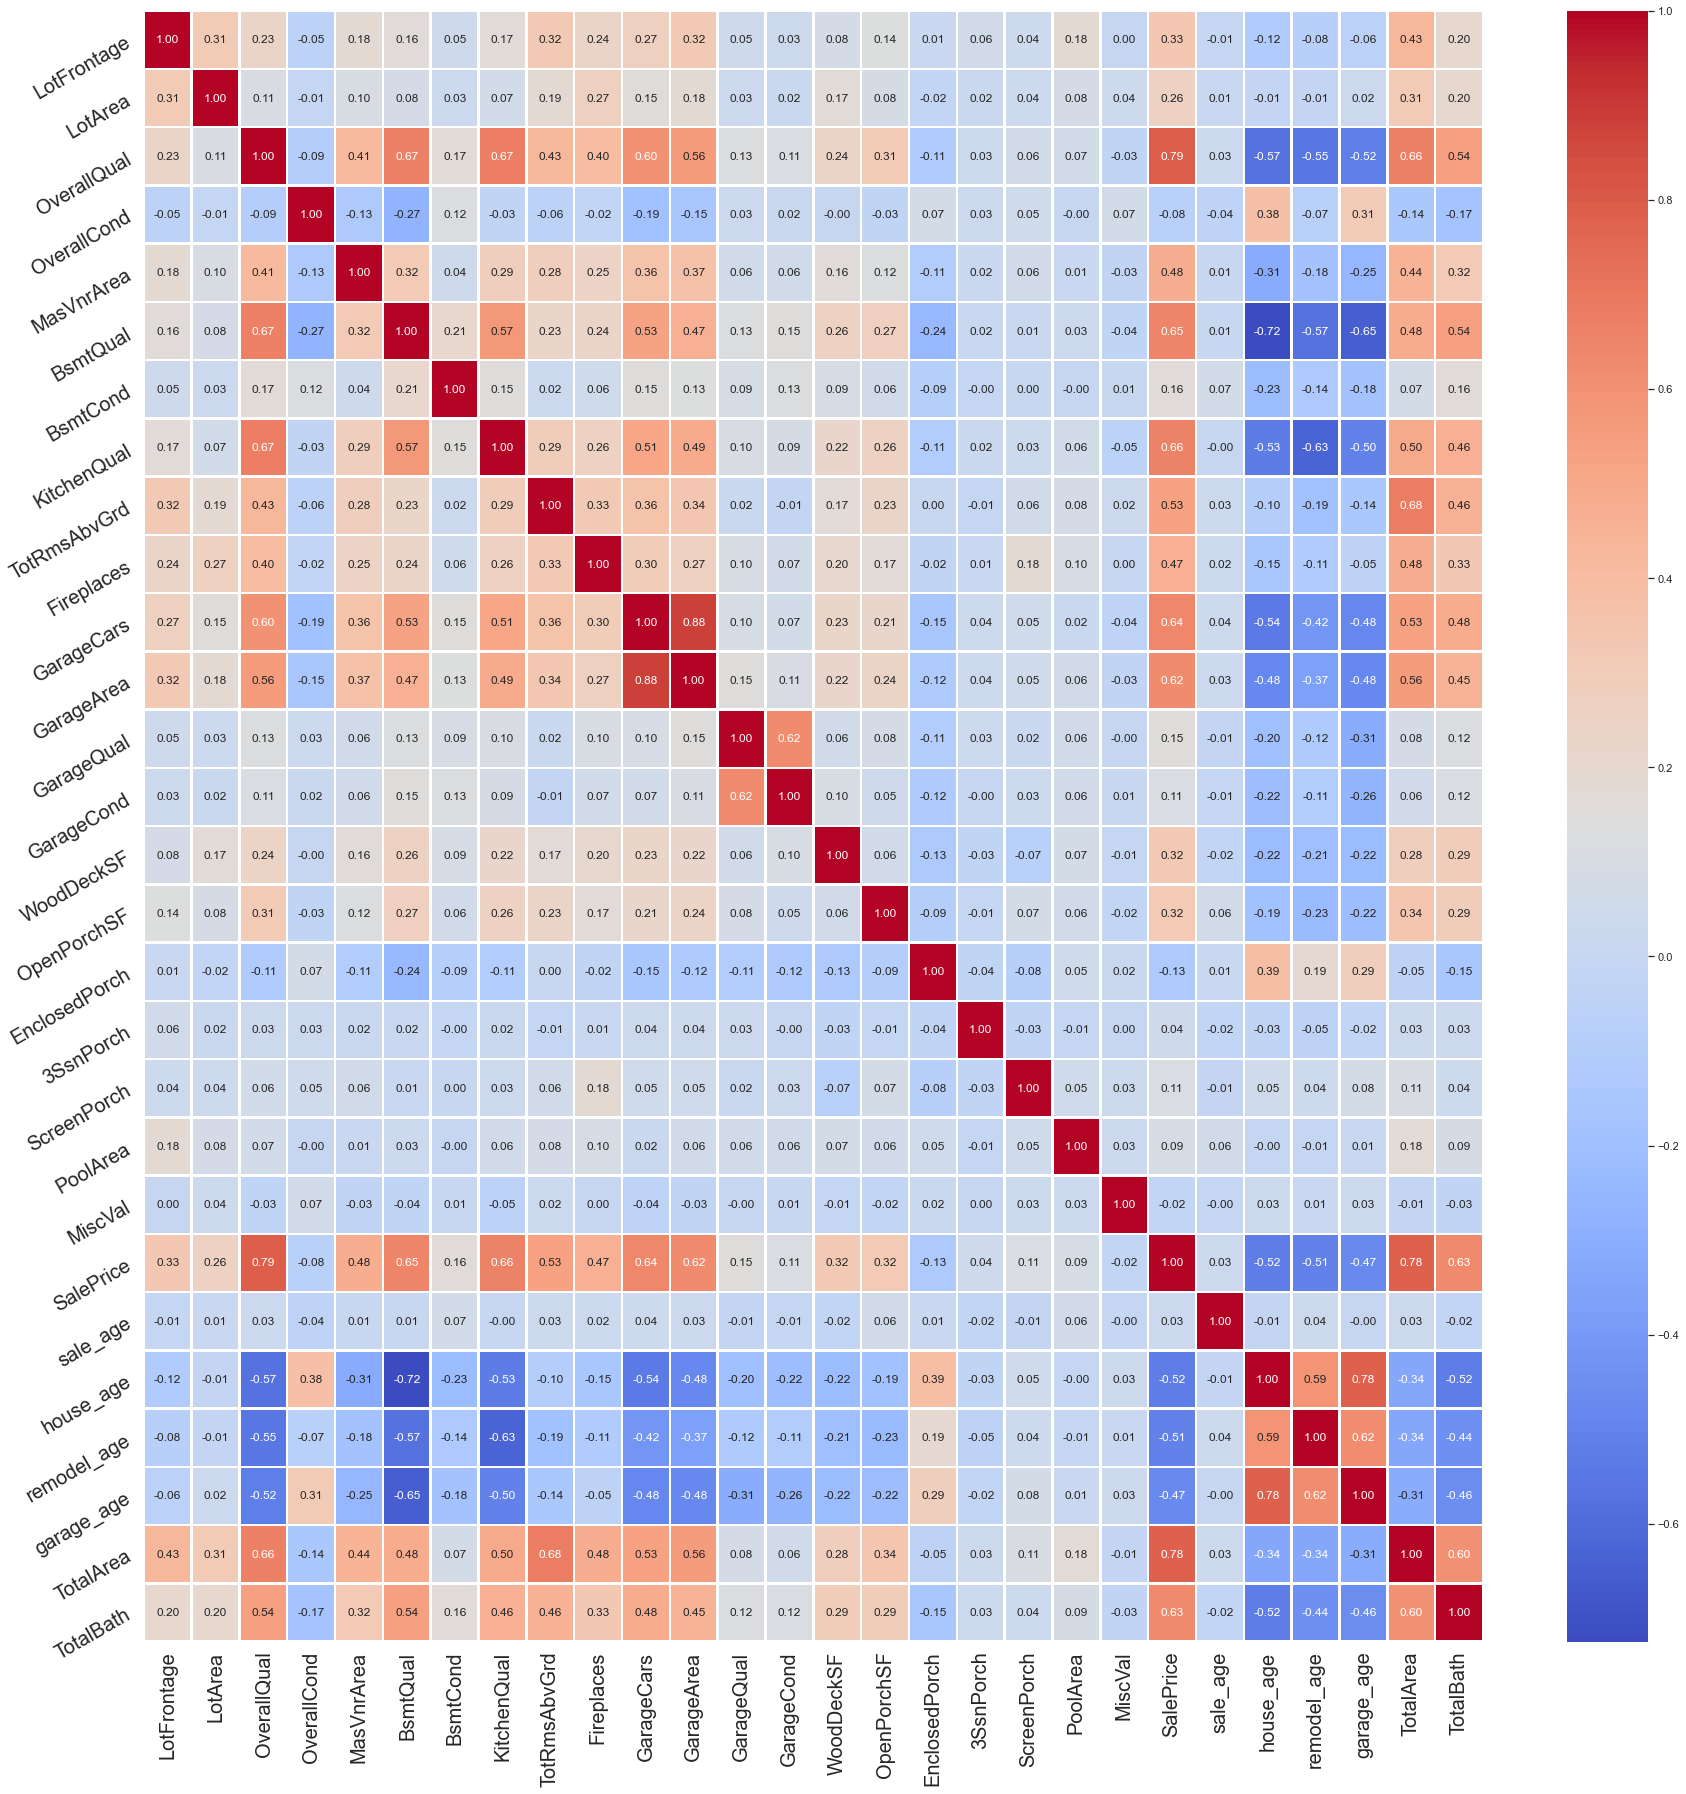

In [292]:
# heatmap of correlation among various attributes

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(30,30))
p = sns.heatmap(corr, annot=True, lw=1.5, fmt='.2f', cmap='coolwarm')
rotxlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':20}, rotation=90)
rotylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':20}, rotation=30)

In [234]:
corr['SalePrice']

LotFrontage      0.334901
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
MasVnrArea       0.475241
BsmtQual         0.650138
BsmtCond         0.159445
KitchenQual      0.659600
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
GarageQual       0.145904
GarageCond       0.114733
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
SalePrice        1.000000
sale_age         0.028923
house_age       -0.522897
remodel_age     -0.507101
garage_age      -0.470177
TotalArea        0.778959
TotalBath        0.631731
Name: SalePrice, dtype: float64

SalePrice is strongly correlated with TotalArea, GarageArea, GarageCars, KitchenQual, BsmtQual, OverallQual

In [235]:
corr[corr>0.6]

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,sale_age,house_age,remodel_age,garage_age,TotalArea,TotalBath
LotFrontage,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,1.000000,NaN,NaN,0.667345,NaN,0.673331,NaN,NaN,0.600671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982,NaN,NaN,NaN,NaN,0.664830,NaN
OverallCond,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtQual,NaN,NaN,0.667345,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650138,NaN,NaN,NaN,NaN,NaN,NaN
BsmtCond,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenQual,NaN,NaN,0.673331,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.659600,NaN,NaN,NaN,NaN,NaN,NaN
TotRmsAbvGrd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.678802,NaN
Fireplaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


house_age is strongly correlated with garage_age

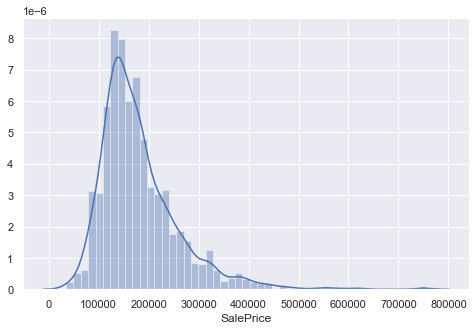

In [236]:
plt.figure(figsize=(8,5))
sns.distplot(data['SalePrice'])

Sale Price of houses is normally distributed

In [288]:
data[['SalePrice', 'OverallQual', 'GarageCars', 'GarageArea']].corr()

,SalePrice,OverallQual,GarageCars,GarageArea
SalePrice,1.000000,0.790982,0.640409,0.623431
OverallQual,0.790982,1.000000,0.600671,0.562022
GarageCars,0.640409,0.600671,1.000000,0.882475
GarageArea,0.623431,0.562022,0.882475,1.000000


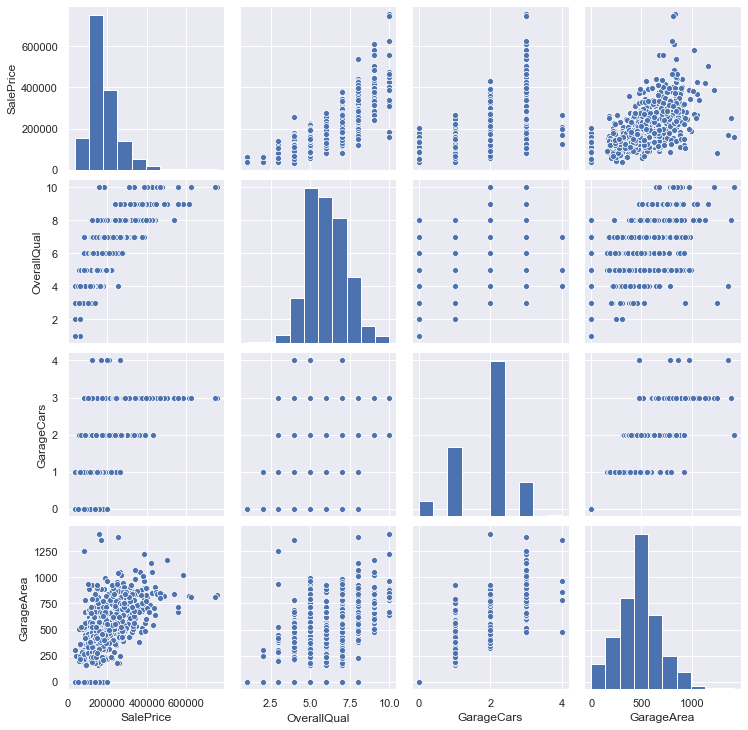

In [290]:
sns.pairplot(data=data[['SalePrice', 'OverallQual',  'GarageCars', 'GarageArea']])

OverallQual, GarageCars, GarageArea are strongly correlated with SalePrice

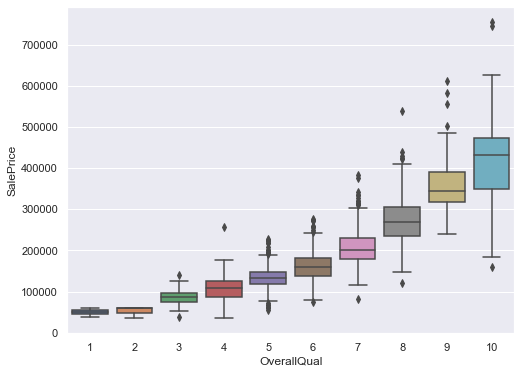

In [291]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=data['OverallQual'], y=data["SalePrice"],)

Higher the Overall quality of house higher the sale price.

In [238]:
cat_cols = ['MSZoning', 'MSSubClass','Street','LotShape', 'LandContour', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 
           'Condition2', 'BldgType','HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType',
            'ExterQual', 'ExterCond','Foundation','BsmtExposure', 'BsmtFinType1',
           'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional','GarageType','GarageFinish', 
            'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']

In [239]:
data_cat = data[cat_cols]

In [240]:
data_cat.head()

,MSZoning,MSSubClass,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MoSold,SaleType,SaleCondition
0,RL,F,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Typ,Attchd,RFn,Y,Feb,WD,Normal
1,RL,A,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,Typ,Attchd,RFn,Y,May,WD,Normal
2,RL,F,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Typ,Attchd,RFn,Y,Sep,WD,Normal
3,RL,G,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Typ,Detchd,Unf,Y,Feb,WD,Abnorml
4,RL,F,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Typ,Attchd,RFn,Y,Dec,WD,Normal


In [241]:
data_cat_with_dummies = pd.get_dummies(data_cat, columns=cat_cols, drop_first=True)

In [242]:
data_cat_with_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_B,MSSubClass_C,MSSubClass_D,MSSubClass_E,MSSubClass_F,MSSubClass_G,MSSubClass_H,MSSubClass_I,MSSubClass_J,MSSubClass_K,MSSubClass_L,MSSubClass_N,MSSubClass_O,MSSubClass_P,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,...,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,

In [243]:
dis_cols = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtQual','BsmtCond','TotalBath','KitchenQual',
            'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF','OpenPorchSF',
            '3SsnPorch', 'ScreenPorch','PoolArea', 'MiscVal', 'SalePrice', 'sale_age', 'house_age','remodel_age','garage_age',
            'TotalArea']

In [244]:
data_dis = data[dis_cols]

In [245]:
data_dis.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,TotalBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,sale_age,house_age,remodel_age,garage_age,TotalArea
0,65.0,8450,7,5,196.0,4.0,3.0,3.5,4.0,8,0,2,548,3.0,3.0,0,61,0,0,0,0,208500,12,17,17,17.0,2566
1,80.0,9600,6,8,0.0,4.0,3.0,2.5,3.0,6,1,2,460,3.0,3.0,298,0,0,0,0,0,181500,13,44,44,44.0,2524
2,68.0,11250,7,5,162.0,4.0,3.0,3.5,4.0,6,1,2,608,3.0,3.0,0,42,0,0,0,0,223500,12,19,18,19.0,2706
3,60.0,9550,7,5,0.0,3.0,4.0,2.0,4.0,7,1,3,642,3.0,3.0,0,35,0,0,0,0,140000,14,105,50,22.0,2473
4,84.0,14260,8,5,350.0,4.0,3.0,3.5,4.0,9,1,3,836,3.0,3.0,192,84,0,0,0,0,250000,12,20,20,20.0,3343


In [246]:
data_final_new = pd.concat([data_dis,data_cat_with_dummies], axis=1)

In [247]:
data_final_new_features = data_final_new.copy()

In [248]:
data_final_new_features.drop(['SalePrice'],axis=1,inplace=True)

## 5. Training and Testing the Model <a id=section5></a>

*** 5.1 Splitting data into training and test datasets** <a id=section501></a>

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_final_new_features, data_final_new['SalePrice'], test_size=0.2, random_state=0)

## 6 Random Forest <a id=section6></a>

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.ensemble import RandomForestRegressor
    model = RandomForestClassifier()
    model.fit(X, y)
    predicted= model.predict(x_test)
    ```

In [250]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

*** 6.1 Random Forest in scikit learn** <a id=section601></a>

In [251]:
# Search for the optimal hyperparameters for RF
param_grid = { 
    'criterion' : ['mse'],
    'n_estimators': [90, 100, 110],
    'max_features': ['auto', 'log2'],
    'max_depth' : [7, 9, 11, 13]    
                }

randomForest_CV = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv = 3)
randomForest_CV.fit(X_train, y_train)
print(randomForest_CV.best_params_)

{'criterion': 'mse', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 100}


In [252]:
# Print the best score
print(randomForest_CV.best_score_)

0.870544196779243


In [253]:
# Get the parameters from the best fit
criterion = randomForest_CV.best_params_.get('criterion')
nRF = randomForest_CV.best_params_.get('n_estimators')
max_features = randomForest_CV.best_params_.get('max_features')
max_depth = randomForest_CV.best_params_.get('max_depth')

# Train the classifier on all the data for predicting the test data (use best hyperparams)
bestRF = RandomForestRegressor(n_estimators=nRF, max_depth=max_depth, max_features=max_features, criterion=criterion)
bestRF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

***6.2 Using the Model for Prediction*** <a id=#section602></a>

In [254]:
y_pred_train = bestRF.predict(X_train)

In [255]:
y_pred_test = bestRF.predict(X_test)  

***6.3 Model evaluation for Random Forest*** <a id=section603></a>

In [256]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [257]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 7256.404801132942
MAE for test set is 17819.16710646057


In [258]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [259]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 124168578.77031656
MSE for test set is 1260080632.491484


In [260]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [261]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 11143.095564981777
RMSE for test set is 35497.61446198158


In [262]:
r2_train =  metrics.r2_score(y_train, y_pred_train)
print(r2_train)

0.9798328111624899


In [263]:
RMSE_test/data['SalePrice'].mean()

0.19620484093794893

## 7. Linear Regression <a id=section7></a>

### 7.1 Linear regression in scikit-learn <a id=section701></a>

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Evaluate - Calculate RMSE and R square

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    lr_model = LinearRegression()
    ll_model.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    r2_test = metrics.r2_score(y_test, y_pred_test)```

In [264]:
# Creating our linear regression model and fitting the data into it.

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 7.2 Using the Model for Prediction <a id=section702></a>

In [265]:
# Making predictions on the train set.

y_pred_train_lr = linreg.predict(X_train)
y_pred_train_lr[:10]

array([366973.27712803,  95701.77369389, 156754.88660685, 254506.42894901,
       219257.04044522, 191265.65099804, 136625.02132322, 161190.41289939,
       110597.45149001, 133588.96463022])

In [266]:
# Making predictions on the test set.

y_pred_test_lr = linreg.predict(X_test)
y_pred_test_lr[:10]

array([290622.75008029, 127504.98189908, 132392.22489262, 227632.39407695,
        88272.69809677,  85954.3800378 , 272656.73705743, 141779.45645172,
       468302.32721076, 159455.3357304 ])

### 7.3 Model evaluation fo Linear Regression <a id=section703></a>

In [267]:
# Calculating the Mean Absolute Error on training and test set.

MAE_train_lr = metrics.mean_absolute_error(y_train, y_pred_train_lr)

In [268]:
print('MAE of the model is {}'.format(MAE_train_lr))

MAE of the model is 14059.305303280222


In [269]:
MAE_test_lr = metrics.mean_absolute_error(y_test, y_pred_test_lr)

In [270]:
print('MAE of the model is {}'.format(MAE_test_lr))

MAE of the model is 23440.80543509223


In [271]:
# Calculating the Mean Squared Error on training and test set.

MSE_train_lr = metrics.mean_squared_error(y_train, y_pred_train_lr)

In [272]:
print('MSE of the model is {}'.format(MSE_train_lr))

MSE of the model is 418475850.6987867


In [273]:
# Calculating the Root Mean Squared Error on training and test set.

RMSE_train_lr = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_lr))

In [274]:
print('RMSE of the model is {}'.format(RMSE_train_lr))

RMSE of the model is 20456.68229940492


In [278]:
RMSE_test_lr = np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_lr))

In [279]:
print('RMSE of the model is {}'.format(RMSE_test_lr))

RMSE of the model is 54688.181197127065


In [280]:
# Calculating R squared value using the metrics.r2_score() method.

R_squared_train_lr = metrics.r2_score(y_train, y_pred_train_lr)


print('R squared value of the model is {}'.format(R_squared_train_lr))

R squared value of the model is 0.932032068108058


In [281]:
RMSE_test_lr/data['SalePrice'].mean()

0.30227625308343214

## 8 Conclusion <a id=section8></a>

* Random Forest ML learning technique is used to define the base algorithm to predict House sale price.
* SalePrice is strongly correlated with TotalArea, GarageArea, GarageCars, KitchenQual, BsmtQual, OverallQual
* Higher the Overall quality of house higher the sale price.
* Model used can predict house sale price with an error of around 19%